# Data Science Course Final Project: *Predicting Wine Quality*

<h2>1. Introduction</h2>

For my final project, I built a predictive model that could predict the quality of a Vinho Verde wine, a portuguese wine, based on the wine's chemical properties.

<p>This data was downloaded from <a href = "https://archive.ics.uci.edu/ml/datasets/wine+quality">here</a> and is from the following research: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In <em>Decision Support Systems</em>, Elsevier, 47(4): 547-553, 2009. 

<p>Two separate datasets, one for red wine and one for white wine varieties, were combined to create one larger dataset to have the most training data. This was possible because both datasets had the same features and target column.

<h2>2. Import Libraries and Set Preliminaries</h2>

In [1]:
# Import Libraries

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
# Specify seaborn style to use for plots/graphs
sns.set_style("darkgrid") 

# Show plots in-line
%matplotlib inline

In [3]:
# Suppress warnings to prevent sklearn warnings from showing up

from warnings import simplefilter                        # import warnings filter
simplefilter(action='ignore')                            # set filter to ignore all warnings

<h2>3. Load Data</h2>

In [4]:
# Load Red Wine and White Wine Datasets

df_red = pd.read_csv("Data/winequality/winequality-red.csv", sep=';')
df_white = pd.read_csv("Data/winequality/winequality-white.csv", sep=';')

In [5]:
# Concatenate them into a third dataframe

df_all = pd.concat([df_red, df_white])

In [6]:
# Ensure concatenation occurred correctly by looking at number of rows in all three dfs; they add up correctly

print(df_red.shape)
print(df_white.shape)
df_all.shape

(1599, 12)
(4898, 12)


(6497, 12)

<h2>4. Exploratory Data Analysis</h2>

In [7]:
# Take a quick first look at data

df_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# Look at data types of data

df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [9]:
df_all.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<hr>
<strong>Observations:</strong>
<ul>
    <li>All data types are numeric, so I won't need to create any dummy variables.</li>
    <li>None of the columns have missing data or null values.</li>
    <li>Quality scores go from a low of 3 to a high of 9 in this particular dataset.
</ul>
<hr>

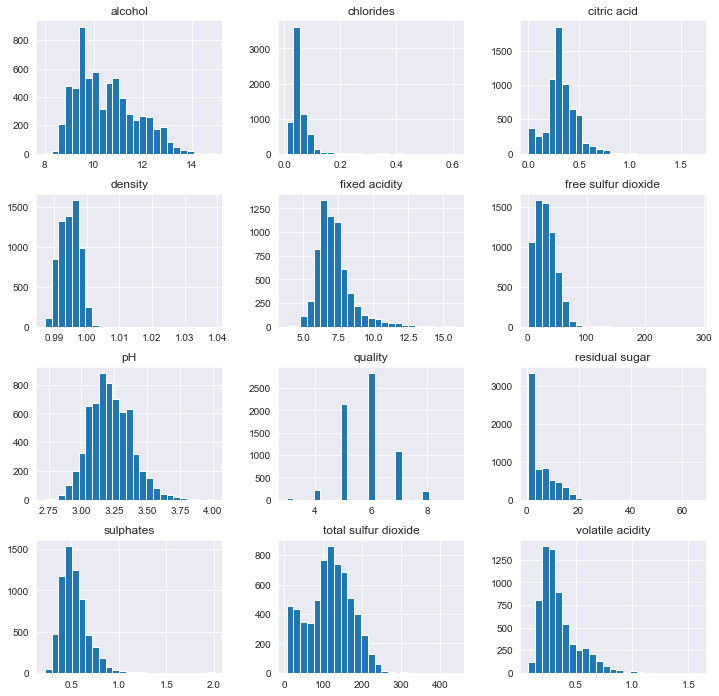

In [10]:
# Visualize distributions of each column

ax = df_all.hist(figsize=(12,12), bins = 25)

<hr>
<strong>Observations:</strong>
<ul>
    <li>Several variables seem to have a somewhat normal distribution (alcohol, citric acid, density, fixed acidity, pH, sulphates, and potentially sulfur dioxide).</li>
    <li>The quality score is a discrete/categorical variable.</li>
</ul>
<hr>

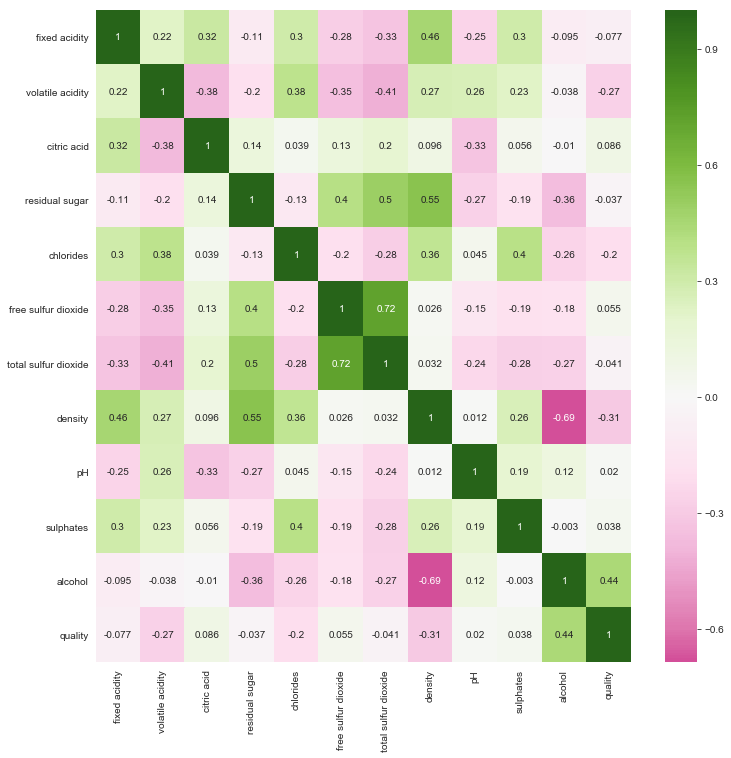

In [11]:
# Create an annotated heatmap to visualize the correlation relationships between variables

fig, ax2 = plt.subplots(figsize=(12,12))         
sns.heatmap(df_all.corr(), center=0, cmap="PiYG", annot = True, ax = ax2);

<hr>
<strong>Observations:</strong>
<ul>
    <li>Alcohol has a positive correlation with the quality score variable but it is a weak correlation. None of the other variables seem to be linearly correlated with quality score.</li>
    <li>There is a moderate negative correlation between density and alcohol.</li>
    <li>There is a weak to moderate positive correlation between density and residual sugar.</li> 
    <li>Residual sugar seems to have a weak positive correlation with total and free sulfur dioxide.</li>
    <li>Density and fixed acidity have a very weak positive correlation.</li>

</ul>
<hr>

<h2>5. Predictive Modeling</h2>

<h4>5.1 Initial Random Forest Classifier Model</h4>

<strong>5.1.1 Building The Model:</strong>

In [12]:
# Splitting columns into target and features
target_col = 'quality'
feature_cols = df_all.columns.drop('quality')

# Creating a dataframe of features (X) and a series of target values (y)
X = df_all.loc[:,feature_cols]
y = df_all.loc[:,target_col]

# Splitting both target and features data into a train test split; setting a random_state to allow comparisons with future train_test_splits
# Data will be shuffled to prevent any issues from the fact that red wine data is concentrated at the top of the df and vice-versa
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, shuffle = True)

In [13]:
# Creating a Random Forest Classifier model instance and fitting the training data to it
rfc = RandomForestClassifier(oob_score = True)
rfc.fit(X_train, y_train)

# Evaluating the model 
print('Training Data Accuracy:', rfc.score(X_train, y_train)) # Training Data Accuracy Score
print('Test Data Accuracy:', rfc.score(X_test, y_test))       # Test Data Accuracy Score

print('Out of Bag Score:', rfc.oob_score_)

Training Data Accuracy: 0.9848111658456487
Test Data Accuracy: 0.64
Out of Bag Score: 0.5950328407224958


<hr>
<strong>Observation:</strong> The model has very low bias (98% accuracy on the training set) but has high variance/is overfitting (big gap between train and test set accuracy scores).
<hr>

<strong>5.1.2 KFold Cross-Validation:</strong>

In [14]:
# Using a 10-Fold cross-validation method instead of the above train-test-split to confirm high variance

kf = KFold(n_splits=10, shuffle=True)

scores = cross_val_score(rfc, X, y, cv = kf)
print('Cross-Validation With 10-Fold Split Scores:', scores)
print('Cross-Validation With 10-Fold Split Average Score:', scores.mean())

Cross-Validation With 10-Fold Split Scores: [0.64       0.65846154 0.68       0.66923077 0.69692308 0.65076923
 0.65846154 0.68567026 0.68567026 0.66101695]
Cross-Validation With 10-Fold Split Average Score: 0.6686203626881594


<hr>
<strong>Observation:</strong> The KFold cross-validation shows a slightly higher average accuracy than the train-test-split accuracy score. I will monitor both scores as I tune the model.
<hr>

<strong>5.1.3 Compare To Null Model:</strong>

In [15]:
# Null Model Accuracy for Entire Dataset

df_all.loc[:,'quality'].value_counts(normalize=True)

6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: quality, dtype: float64

In [16]:
# Null Model Accuracy for test set

y_test.value_counts(normalize=True)

6    0.440615
5    0.324308
7    0.169846
8    0.030154
4    0.029538
3    0.004923
9    0.000615
Name: quality, dtype: float64

<hr>
<strong>Observation:</strong> The initial model is performing better than the null model, which would have only 43 to 44% accuracy.
<hr>

<h4>5.2 Optimizing N_Estimators</h4>

In [17]:
# Defining a function that will return the train and test set score for the specified n_estimator value

def n_estimator_score (n_estimator_num):
    rfc2 = RandomForestClassifier(n_estimators = n_estimator_num)                            
    rfc2.fit(X_train, y_train)                                             
    return rfc2.score(X_train, y_train), rfc2.score(X_test, y_test)

In [18]:
# Creating 3 lists to hold the n_estimators number that was checked, the train set score, and the test set score
n_estimator_nums = []
n_estimator_scores_train = []
n_estimator_scores_test = []

# Creating a for-loop that will check and collect train and test set scores for the specified range of n_estimators
for num in range(1,1000,50):                # checking a range of 100 to 1000 n_estimators at 50-tree intervals
    n_estimator_nums.append(num)            # creating a list of n_estimator values that were checked
    tr, ts = n_estimator_score(num)         # calling the previously defined n_estimator_score function
    n_estimator_scores_train.append(tr)     # creating a list of train scores for each n_estimator value
    n_estimator_scores_test.append(ts)      # creating a list of test scores for each n_estimator value
    
# Combining the three lists into a DataFrame for easier viewing; setting the N_Estimator Number column as the index for the df
df = pd.DataFrame({'N_Estimator Number':n_estimator_nums, 'Train Set Scores': n_estimator_scores_train, 'Test Set Scores': n_estimator_scores_test})
df.set_index ('N_Estimator Number', inplace = True)      

# Displaying df
df

,Train Set Scores,Test Set Scores
N_Estimator Number,,
1,0.836617,0.548923
51,1.000000,0.681231
101,1.000000,0.678769
151,1.000000,0.681231
201,1.000000,0.674462
251,1.000000,0.683692
301,1.000000,0.682462
351,1.000000,0.676308
401,1.000000,0.682462


<hr>
<strong>Observation:</strong> As long as the n_estimators parameter is set to 100 or above, the test scores seem to hover around 67% to 68% (while training scores are at approximately 100%). This is a slight improvement in both train and test scores from the default n_estimators value of the model though it doesn't seem to indicate much of an improvement on the variance/overfitting. I will set the n_estimators to 100 in further tuning the model. 
<hr>

<h4>5.3 Tuning Other Random Forest Classifier Model Parameters</h4>

Since the training score is now at 100%, the goal in tuning parameters now is to reduce variance and overfitting by reducing the gap in train and test scores. Consequently, I need to make the model more restrictive. I will start by using a GridSearchCV to test varying combinations of parameters to maximize the test score.

In [33]:
# Creating and using a GridSearchCV object to check multiple parameter combinations at once; n_estimators is fixed at 100

rfc3 = RandomForestClassifier (n_estimators = 100)              # instantiating a basic random forest classifier to use in gridsearch

parameters = {'max_features':np.arange(1,12),                   # specifying the parameters to test
              'min_samples_leaf': [1,10,50,100], 
              'max_depth': np.arange(50,150,10)
              }

param_optimizer_grid = GridSearchCV(rfc3, parameters, cv = kf)  # creating a GridSearchCV object that can be fitted to the data

In [ ]:
# Fitting the GridSearchCV object to the training data 
# [UNCOMMENT THE BELOW TO RUN--TAKES A LONG TIME TO RUN]
# param_optimizer_grid.fit(X_train, y_train)

In [ ]:
# Viewing the best parameter values from the tuning
# [UNCOMMENT THE BELOW TO RUN]
# param_optimizer_grid.best_params_

In [35]:
# Creating a Random Forest Classifier model instance using the best_params parameters and fitting the training data to it
rfc4 = RandomForestClassifier(n_estimators = 100, max_features = 1, min_samples_leaf = 1, max_depth = 140, oob_score = True)
rfc4.fit(X_train, y_train)

# Evaluating the model 
print('Training Data:', rfc4.score(X_train, y_train)) # Training data accuracy score 
print('Test Data:', rfc4.score(X_test, y_test))       # Test data accuracy score 

# Printing out an oob_score to double-check how good the model is
print('Out of Bag Score:', rfc4.oob_score_)

# Doublechecking with KFold cross-validation
scores = cross_val_score(rfc4, X, y, cv = kf)
print('Cross-Validation With 10-Fold Split Scores:', scores)
print('Cross-Validation With 10-Fold Split Average Score:', scores.mean())

Training Data: 1.0
Test Data: 0.6744615384615384
Out of Bag Score: 0.6798029556650246
Cross-Validation With 10-Fold Split Scores: [0.67230769 0.68769231 0.66769231 0.68769231 0.71692308 0.72769231
 0.70615385 0.7257319  0.7164869  0.69953775]
Cross-Validation With 10-Fold Split Average Score: 0.7007910394690056


<hr>
<strong>Observation:</strong> Tuning seems to have increased the test set accuracy scores slightly.
<hr>

<h4>5.4 Training Model with 100% Data</h4>

I decided to try training with 100% of the data because adding more data is one way to decrease variance. I will use a cross-val score and oob-scores to check accuracy.

In [36]:
# Creating a Random Forest Classifier model instance with the tuned parameters and fitting the training data to it
rfc6 = RandomForestClassifier(n_estimators = 100, max_features = 1, min_samples_leaf = 1, max_depth = 140, oob_score = True)
rfc6.fit(X, y)

# Evaluating the model 
print('Full Dataset Accuracy:', rfc6.score(X, y)) 
print('Full Dataset Out of Bag Error Score:', rfc6.oob_score_)

# Doublechecking model performance with a 5Fold Cross-Validation Score
scores = cross_val_score(rfc6, X, y, cv = kf)
print('Cross-Validation With 10-Fold Split Scores:', scores)
print('Cross-Validation With 10-Fold Split Average Score:', scores.mean())  

Full Dataset Accuracy: 1.0
Full Dataset Out of Bag Error Score: 0.7132522702785902
Cross-Validation With 10-Fold Split Scores: [0.68153846 0.69230769 0.69538462 0.69846154 0.69230769 0.71230769
 0.70615385 0.70570108 0.67488444 0.73805855]
Cross-Validation With 10-Fold Split Average Score: 0.6997105606258148


<hr>
<strong>Observation:</strong> The OOB score has increased when I train the model on the entire dataset but the cross-val score remains the same. This model has the lowest variance thus far and I will use this to further tune the model.
<hr>

<h4>5.5 Feature Engineering</h4>

<strong>5.5.1 Ranking Feature Importances</strong>

In [37]:
# Using rfc6 from Section 5.4 to rank feature importances and obtain the indices and feature names in order to plot them

feat_importances = rfc6.feature_importances_                                # creating a feature importances array
sorted_feat_importances_worst_first = np.sort(feat_importances)             # sorting the values of the feature importances
ranked_feature_indices_worst_first = feat_importances.argsort()             # obtaining the indices of the sorted importances
ranked_features_worst_first = X.columns[ranked_feature_indices_worst_first] # obtaining the strings corresponding to the indices

In [38]:
print(ranked_features_worst_first) # print the list of features from lowest importance to highest

Index(['fixed acidity', 'pH', 'free sulfur dioxide', 'residual sugar',
       'citric acid', 'sulphates', 'chlorides', 'total sulfur dioxide',
       'volatile acidity', 'density', 'alcohol'],
      dtype='object')


In [39]:
# Combining all the lists into a DataFrame for easier viewing; setting the feature name column as the index for the df
df2 = pd.DataFrame({'Feature':ranked_features_worst_first, 'Importances Score': sorted_feat_importances_worst_first})
df2.set_index ('Feature', inplace = True) 
df2

,Importances Score
Feature,
fixed acidity,0.079264
pH,0.083688
free sulfur dioxide,0.085096
residual sugar,0.085110
citric acid,0.085351
sulphates,0.087715
chlorides,0.089674
total sulfur dioxide,0.090145
volatile acidity,0.096766


<strong>5.5.2 Plotting the Feature Importances</strong>

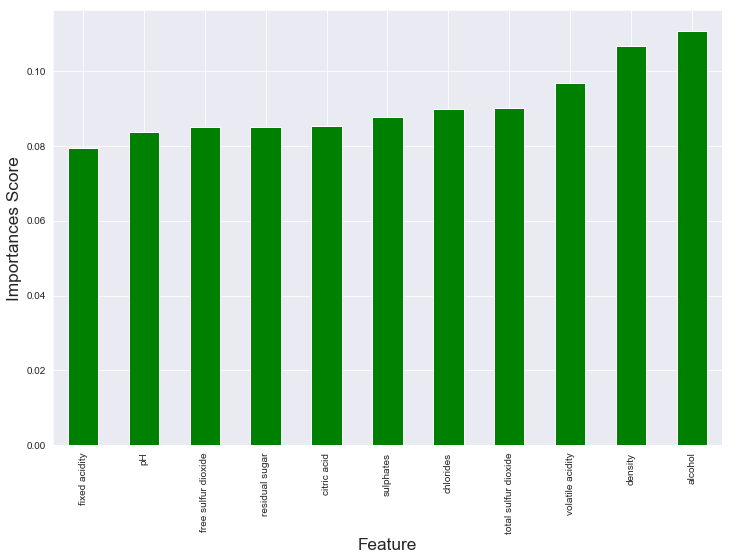

In [40]:
ax3 = df2.plot(kind = 'bar', figsize = (12,8), legend = False, color = 'green')
ax3.set_ylabel('Importances Score', fontsize='xx-large')
ax3.set_xlabel('Feature', fontsize='xx-large');

<hr>
<strong>Observation:</strong> This ranking of features seems to make sense based on the correlation heatmap created during EDA: Alcohol and density had the strongest correlation with the quality score (though in absolute terms, they were weak correlations). 
<hr>

<strong>5.5.3 Tuning Model By Dropping Features</strong>

In [41]:
# Creating a function with the parameter-tuned model to use in testing various combinations of features. 

def return_model_scores (X, y):
    # Creating a Random Forest Classifier model instance with the tuned parameters and fitting the training data to it
    rfc7 = RandomForestClassifier(n_estimators = 100, max_features = 1, min_samples_leaf = 1, max_depth = 140, oob_score = True)
    rfc7.fit(X, y)

    # Obtaining 5Fold Cross-Validation Score
    kf = KFold(n_splits = 5, shuffle=True)
    scores = cross_val_score(rfc6, X, y, cv = kf)
        
    # Return scores
    return rfc7.score(X,y), rfc7.oob_score_, scores.mean()

In [42]:
### Code that will drop features one at a time worst-to-best and check the model scores for each iteration

# Creating a list of ranked features to iterate through
ranked_features_worst_first = list(ranked_features_worst_first)

# Creating lists to hold the dropped features and the returned scores for each additional dropped feature
dropped_features = []
accuracy_scores = []
oob_scores = []
cross_val_scores = []

# Initializing a new dataframe X_modified to use in for-loop so original X remains untouched
X_modified = X

# Using a for-loop to drop features one at a time from bottom of the list and check the model scores

for feature in ranked_features_worst_first:
    X_modified = X_modified.drop(feature, axis = 1)              # drop another feature from X_modified at each iteration of for-loop
    if len(X_modified.columns) == 0:                             # end for-loop when all features have been dropped
        break
    dropped_features.append(feature)                             # keep track of which feature is dropped by appending to a list
    acc, oob, cross = return_model_scores (X_modified, y)        # obtain scores from return_model_scores function
    accuracy_scores.append(acc)                                  # append the scores to the three lists
    oob_scores.append(oob)
    cross_val_scores.append(cross)
    

# Combining all the lists into a DataFrame for easier viewing; setting the dropped_features column as the index for the df
df3 = pd.DataFrame({'(Additional) Dropped Feature':dropped_features, 
                    'Model Accuracy Scores': accuracy_scores, 
                    'Model OOB Scores': oob_scores,
                    'Model Cross-Val Scores':cross_val_scores
                   })
df3.set_index ('(Additional) Dropped Feature', inplace = True) 

In [43]:
# Viewing how scores change as additional features are dropped from the data
df3

,Model Accuracy Scores,Model OOB Scores,Model Cross-Val Scores
(Additional) Dropped Feature,,,
fixed acidity,1.000000,0.706634,0.692631
pH,1.000000,0.710328,0.692627
free sulfur dioxide,1.000000,0.701401,0.686162
residual sugar,1.000000,0.695552,0.677546
citric acid,1.000000,0.702632,0.680158
sulphates,1.000000,0.692012,0.667078
chlorides,0.999846,0.684162,0.657379
total sulfur dioxide,0.993997,0.655841,0.641527
volatile acidity,0.885640,0.577189,0.557182


<hr>
<strong>Observation:</strong> Unfortunately, dropping any features decreases all three of the scores so dropping features is not a good option. 
<hr>

<strong>5.5.4 Tuning Model By Transforming Features</strong>

After trying various polynomial transformations including adding the logarithm or quadratic values of skewed variables, I concluded that none of them decreased the variance/increased the test set or cross-val scores.

<h2>6. Conclusion</h2>

Despite tuning the parameters of the Random Forest Classifier and feature engineering, the model variance did not significantly decrease. The best model has a 70% accuracy for predictive modeling of test data. This is still higher than the null model score of 44%. The only way to increase test scores/decrease variance with this dataset seems to be to collect more data. The best model I was able to obtain is below:

In [44]:
# Splitting columns into target and features
target_col = 'quality'
feature_cols = df_all.columns.drop('quality')  # using all features optimized the accuracy scores

# Creating a dataframe of features (X) and a series of target values (y)
X = df_all.loc[:,feature_cols]
y = df_all.loc[:,target_col]

rfc_final = RandomForestClassifier(n_estimators = 100, max_features = 1, min_samples_leaf = 1, max_depth = 140, oob_score = True)
rfc_final.fit(X, y)

# Evaluating the model 
print('Full Dataset Accuracy:', rfc_final.score(X, y)) 
print('Full Dataset Out of Bag Error Score:', rfc_final.oob_score_)

# Doublechecking model performance with a 5Fold Cross-Validation Score
scores = cross_val_score(rfc_final, X, y, cv = kf)
print('Cross-Validation With 10-Fold Split Scores:', scores)
print('Cross-Validation With 10-Fold Split Average Score:', scores.mean())

Full Dataset Accuracy: 1.0
Full Dataset Out of Bag Error Score: 0.7103278436201323
Cross-Validation With 10-Fold Split Scores: [0.70153846 0.71076923 0.71538462 0.69230769 0.69384615 0.69230769
 0.68923077 0.7164869  0.69029276 0.72265023]
Cross-Validation With 10-Fold Split Average Score: 0.7024814507526371
